### Visualizaciones de datos para el dataset Police_Arrests_20240702
En este notebook "03_visualizaciones" se ejecutan codigos para agregar  visualizaciones en función de las variables ya existentes al "df_limpio" con las nuevas variales resultante del notebook "02_creacion_de_variables"

In [97]:
# Importo librerias de python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
# Declaro el dataframe a usar
eccomerce_sales =r'C:\Users\Administrador\OneDrive - udd.cl\Python para la ciencia de datos\proyecto_final\Data\Police_Arrests_20240702.csv'
df = pd.read_csv(eccomerce_sales)

In [99]:
# Replico los pasos claves para llegar a df_limpio
df['Event Date/Time'] = pd.to_datetime(df['Event Date/Time'])
df_sin_nulos = df.dropna()
df_limpio= df_sin_nulos.loc[(df_sin_nulos["Subject's age"] <= 80) & (df_sin_nulos["Subject's age"] >= 18)]
# Agrego columnas para año, mes, semana y día de la semana
df_limpio['Year'] = df_limpio['Event Date/Time'].dt.year
df_limpio['Month'] = df_limpio['Event Date/Time'].dt.month
df_limpio['Week'] = df_limpio['Event Date/Time'].dt.isocalendar().week
df_limpio['Weekday'] = df_limpio['Event Date/Time'].dt.day_name()
bins = [18, 30, 50, float('inf')]
labels = ['Adulto joven', 'Adulto maduro', 'Adulto mayor']
df_limpio['AgeGroup'] = pd.cut(df_limpio["Subject's age"], bins=bins, labels=labels, right=False)

# Verifico df limpio
info = df_limpio.info()
print(info)

<class 'pandas.core.frame.DataFrame'>
Index: 16317 entries, 0 to 23509
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID Reference Number     16317 non-null  int64         
 1   Subject's race          16317 non-null  object        
 2   Subject's gender        16317 non-null  object        
 3   Subject's age           16317 non-null  int64         
 4   Ethnicity               16317 non-null  object        
 5   District of occurrence  16317 non-null  float64       
 6   Adjacent to School      16317 non-null  int64         
 7   Assigned Division       16317 non-null  object        
 8   Assigned Bureau         16317 non-null  object        
 9   Event Date/Time         16317 non-null  datetime64[ns]
 10  Year                    16317 non-null  int32         
 11  Month                   16317 non-null  int32         
 12  Week                    16317 non-null  UInt32     

C:\Users\Administrador\AppData\Local\Temp\ipykernel_6452\3399589432.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['Year'] = df_limpio['Event Date/Time'].dt.year
C:\Users\Administrador\AppData\Local\Temp\ipykernel_6452\3399589432.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['Month'] = df_limpio['Event Date/Time'].dt.month
C:\Users\Administrador\AppData\Local\Temp\ipykernel_6452\3399589432.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

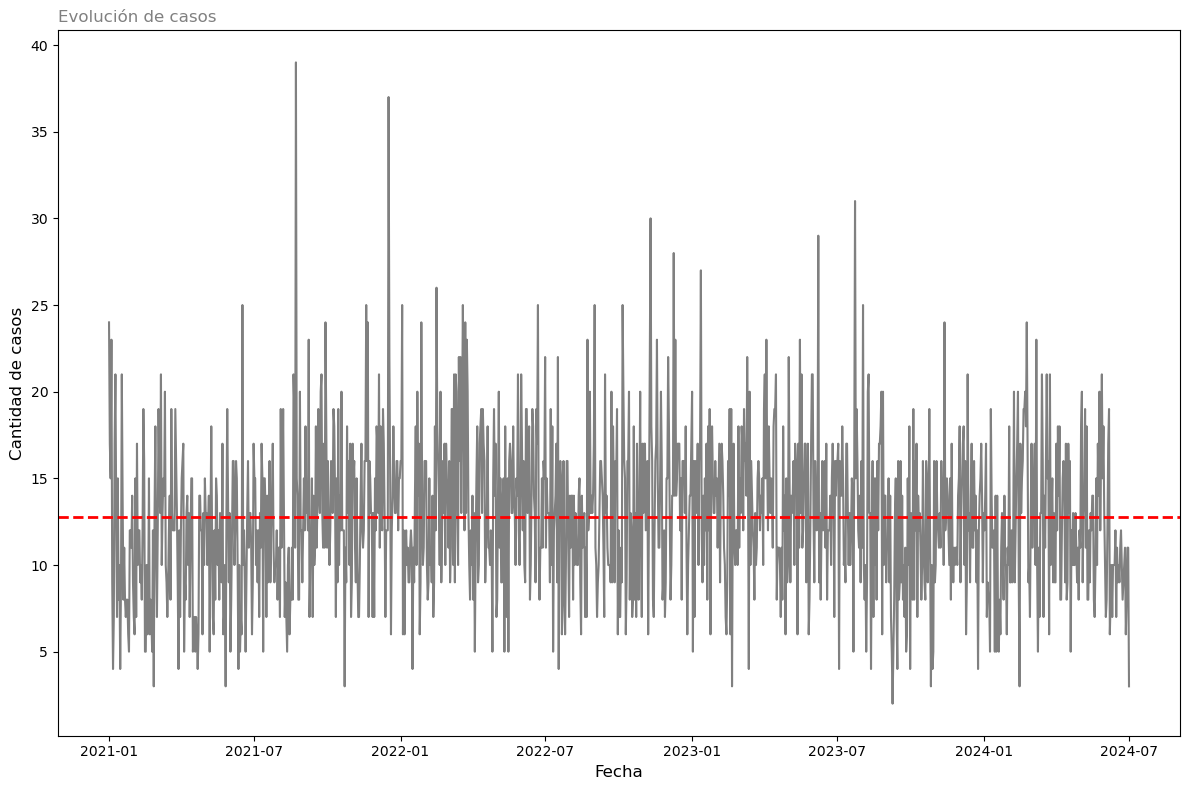

In [100]:
# Agrupar por día y contar los sucesos
casos_por_dia = df_limpio['Event Date/Time'].dt.date.value_counts().sort_index()
promedio_casos = casos_por_dia.mean()
fig, ax = plt.subplots(figsize=(12, 8))
casos_por_dia.plot(kind='line', color='grey', ax=ax)
ax.axhline(promedio_casos, color='red', linestyle='--', linewidth=2, label=f'Promedio: {promedio_casos:.2f}')
ax.set_xlabel('Fecha', fontsize=12)
ax.set_ylabel('Cantidad de casos', fontsize=12)
ax.set_title('Evolución de casos', fontsize=12, color='grey', loc='left')
plt.tight_layout()
plt.show()

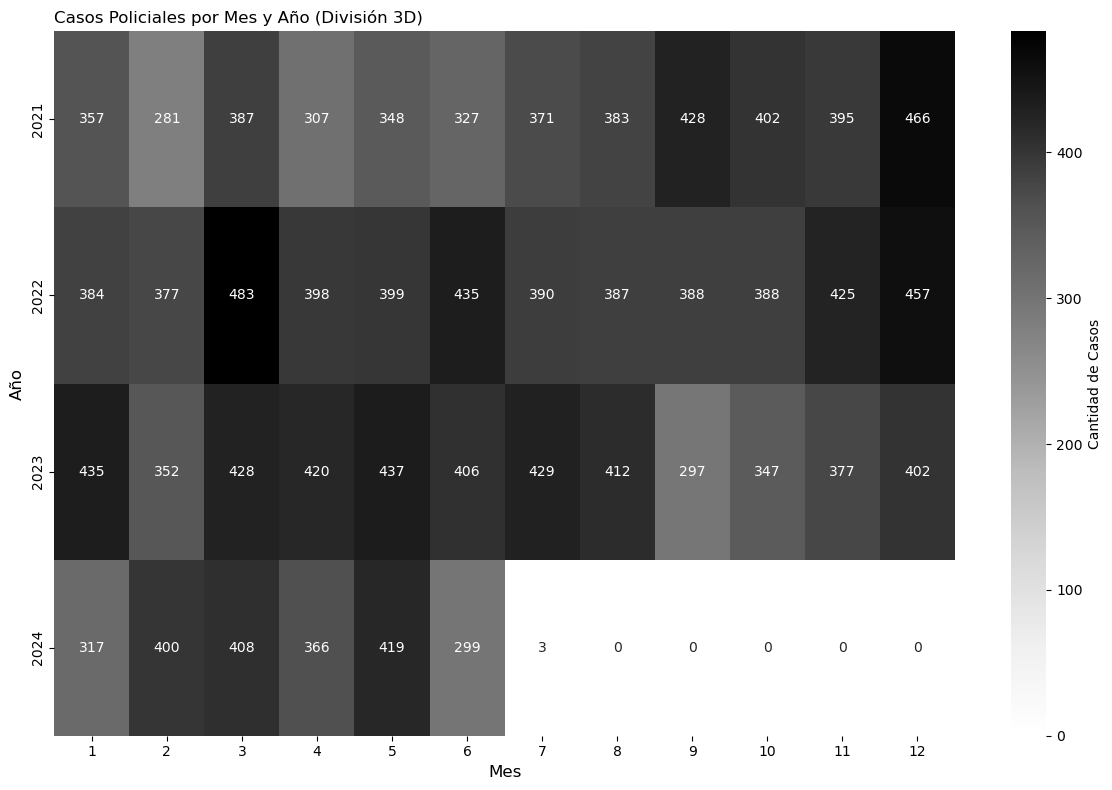

In [101]:
# ¿Cuando ocurren mas sucesos en la oficina con más casos?
mapa_de_casos = df_limpio.groupby([df_limpio['Event Date/Time'].dt.year, df_limpio['Event Date/Time'].dt.month]).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(mapa_de_casos, cmap='Greys', annot=True, fmt='d', cbar_kws={'label': 'Cantidad de Casos'})
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Año', fontsize=12)
plt.title('Casos Policiales por Mes y Año (División 3D)', fontsize=12, loc='left')
plt.tight_layout()
plt.show()

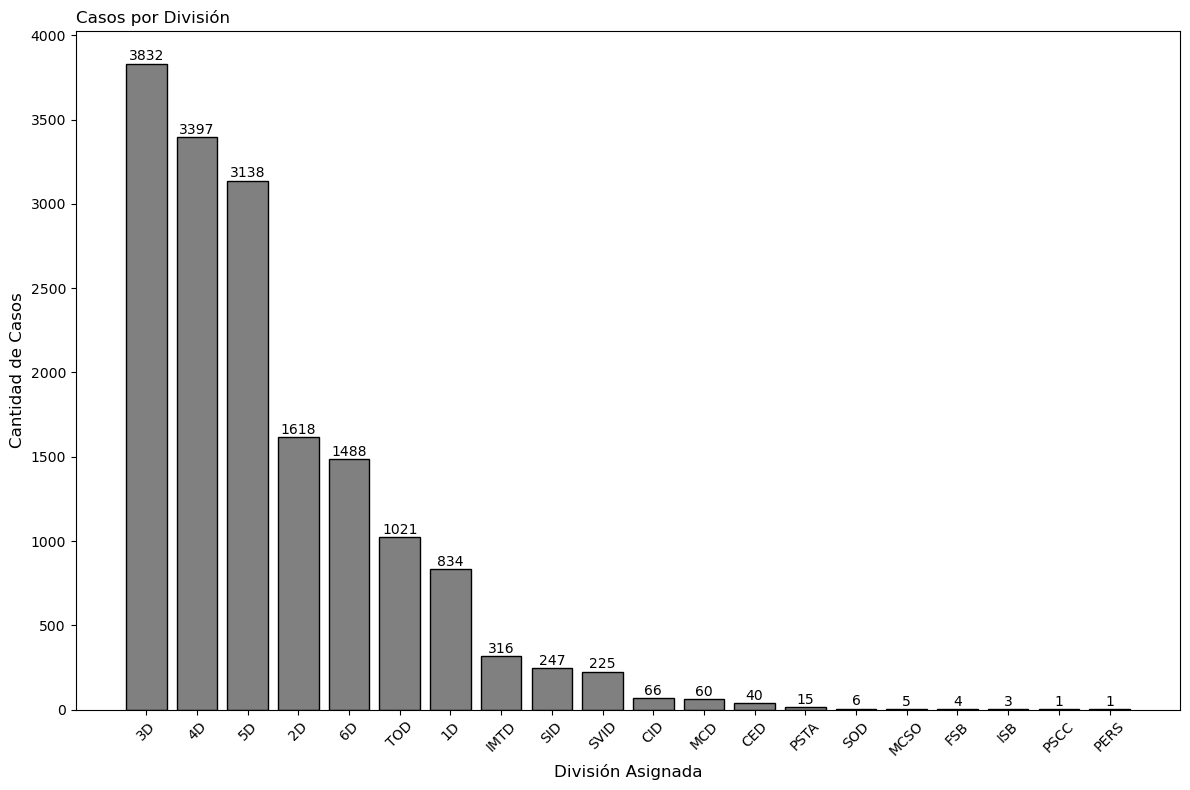

In [126]:
# ¿Cuales son las oficinas con más cantidad de casos?
division_counts = df_limpio['Assigned Division'].value_counts()
fig, ax = plt.subplots(figsize=(12, 8))
Grafico_barra = ax.bar(division_counts.index, division_counts.values, color='grey', edgecolor='black')
for barra in Grafico_barra:
    yval = barra.get_height()
    ax.text(barra.get_x() + barra.get_width()/2, yval + 1, int(yval), ha='center', va='bottom')
ax.set_xlabel('División Asignada', fontsize=12)
ax.set_ylabel('Cantidad de Casos', fontsize=12)
ax.set_title('Casos por División', fontsize=12, loc = "left" )
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

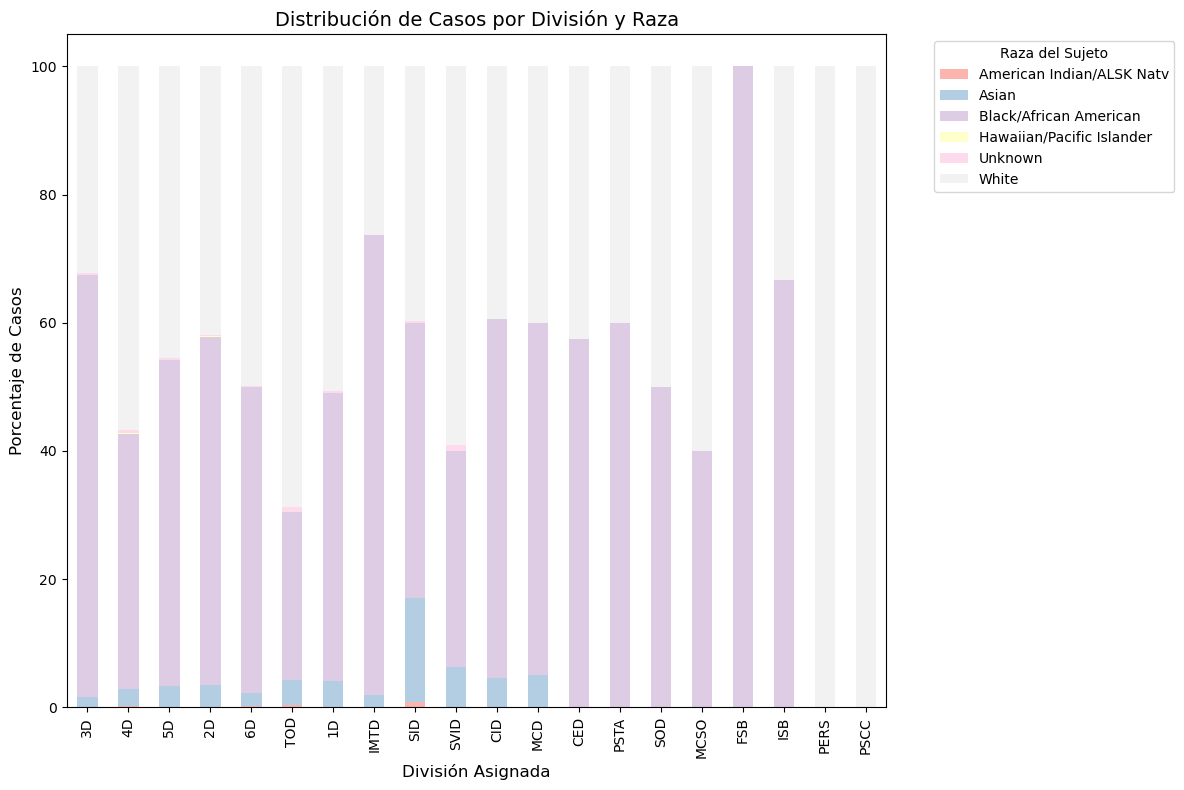

In [127]:
# Agrupar por oficina y raza, y contar los sucesos
grouped = df_limpio.groupby(['Assigned Division', "Subject's race"]).size().unstack(fill_value=0)
grouped = grouped.loc[grouped.sum(axis=1).sort_values(ascending=False).index]
grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100
grouped_percentage.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Pastel1')
plt.xlabel('División Asignada', fontsize=12)
plt.ylabel('Porcentaje de Casos', fontsize=12)
plt.title('Distribución de Casos por División y Raza', fontsize=14)
plt.legend(title="Raza del Sujeto", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

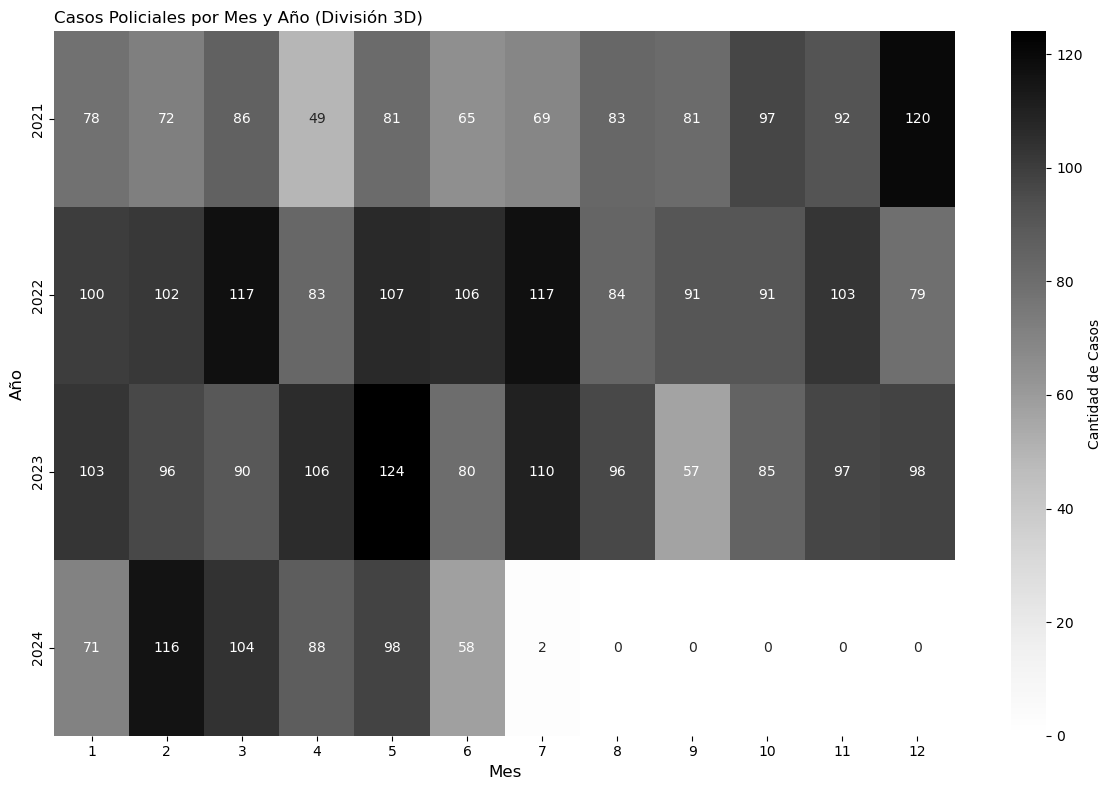

In [128]:
# ¿Cuando ocurren mas sucesos en la oficina con más casos?
df_3D = df_limpio[df_limpio['Assigned Division'] == '3D']
mapa_de_casos = df_3D.groupby([df_3D['Event Date/Time'].dt.year, df_3D['Event Date/Time'].dt.month]).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(mapa_de_casos, cmap='Greys', annot=True, fmt='d', cbar_kws={'label': 'Cantidad de Casos'})
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Año', fontsize=12)
plt.title('Casos Policiales por Mes y Año (División 3D)', fontsize=12, loc='left')
plt.tight_layout()
plt.show()

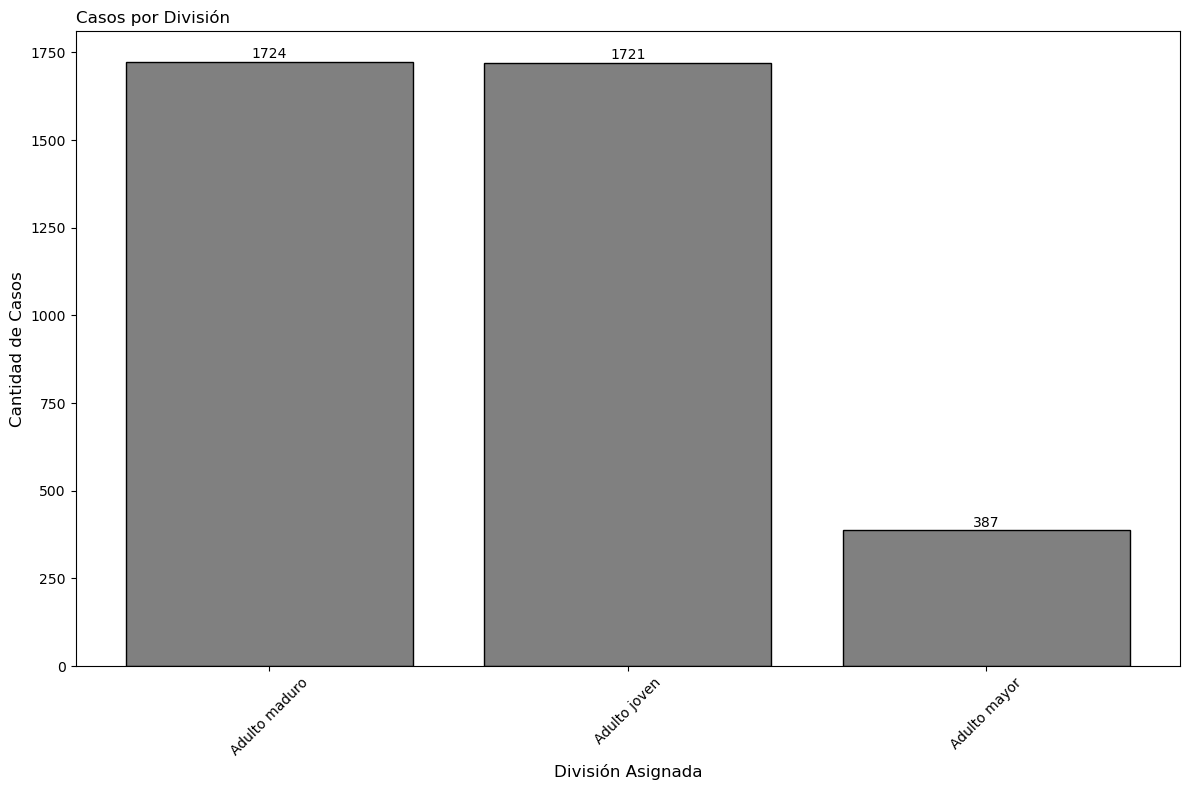

In [123]:
# ¿Cuales son las oficinas con más cantidad de casos?
division_counts = df_3D['AgeGroup'].value_counts()
fig, ax = plt.subplots(figsize=(12, 8))
Grafico_barra = ax.bar(division_counts.index, division_counts.values, color='grey', edgecolor='black')
for barra in Grafico_barra:
    yval = barra.get_height()
    ax.text(barra.get_x() + barra.get_width()/2, yval + 1, int(yval), ha='center', va='bottom')
ax.set_xlabel('División Asignada', fontsize=12)
ax.set_ylabel('Cantidad de Casos', fontsize=12)
ax.set_title('Casos por División', fontsize=12, loc = "left" )
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Administrador\AppData\Local\Temp\ipykernel_6452\2909823377.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Subject's race", y="Subject's age", data=df_3D_Adultomaduro, palette='Set2')


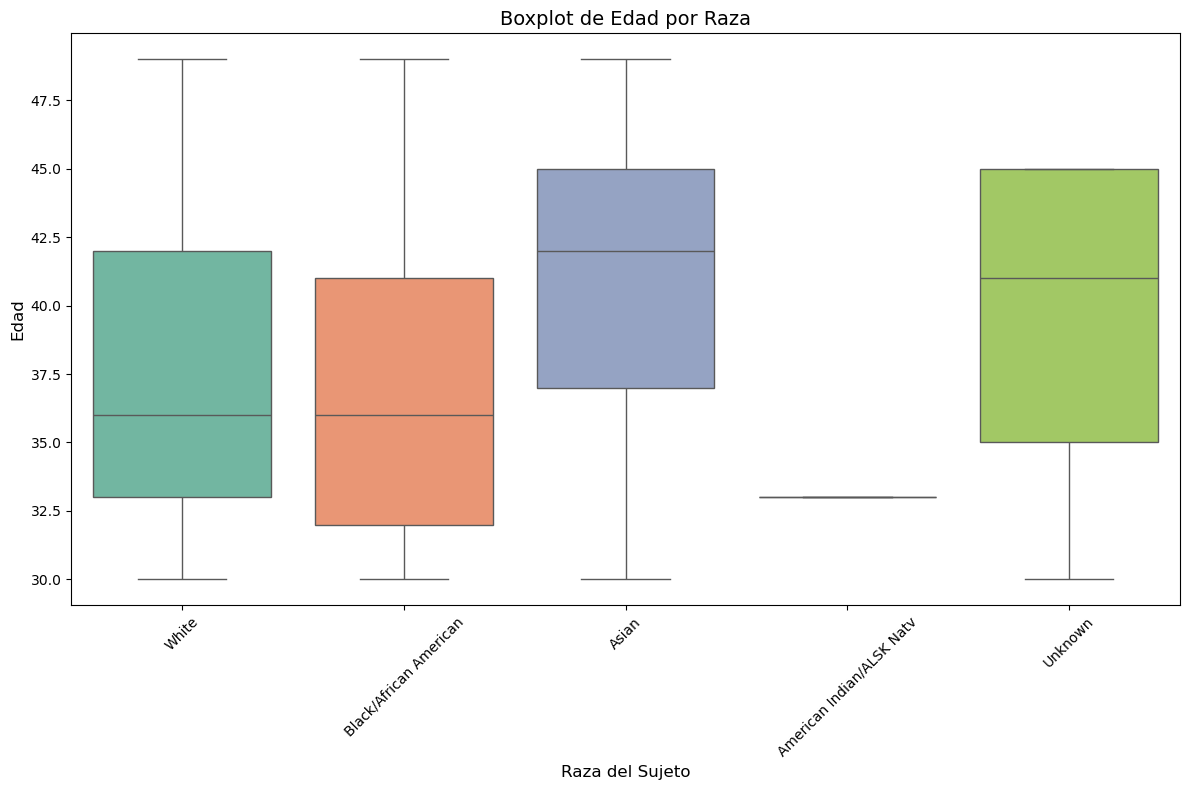

In [124]:
df_3D_Adultomaduro = df_3D[df_3D['AgeGroup'] == 'Adulto maduro']
plt.figure(figsize=(12, 8))
sns.boxplot(x="Subject's race", y="Subject's age", data=df_3D_Adultomaduro, palette='Set2')
plt.xlabel('Raza del Sujeto', fontsize=12)
plt.ylabel('Edad', fontsize=12)
plt.title('Boxplot de Edad por Raza', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()